In [1]:
TRAIN_DATA_DIR = '/content/chest_xray/chest_xray/train'
VALIDATION_DATA_DIR = '/content/chest_xray/chest_xray/val'
TEST_DATA_DIR = '/content/chest_xray/chest_xray/test'
ROOT_DIR = '/content'

In [2]:
import shutil
import os

DATA_DIR = os.path.join(ROOT_DIR,'chest_xray')

if os.path.exists(DATA_DIR):
    shutil.rmtree(DATA_DIR)
    print(DATA_DIR, 'is removed !')

In [3]:
import zipfile
import os

DATA_DIR = '/content/drive/MyDrive/Git/ICT_Visual/Data'

try:
    with zipfile.ZipFile(os.path.join(DATA_DIR,'Chest_X-Ray.zip')) as target_file:
        target_file.extractall()
except Exception as err:
    print(str(err))

# 전체 데이터 개수 확인

In [4]:
train_label_list = os.listdir(TRAIN_DATA_DIR)

print(train_label_list)
for label_name in train_label_list:
    print(f'train {label_name} => {len(os.listdir(os.path.join(TRAIN_DATA_DIR,label_name)))}')

print('================================================')

val_label_list = os.listdir(VALIDATION_DATA_DIR)
print(val_label_list)

for label_name in val_label_list:
    print(f'val {label_name} => {len(os.listdir(os.path.join(VALIDATION_DATA_DIR,label_name)))}')

print('================================================')

test_label_list = os.listdir(TEST_DATA_DIR)
print(test_label_list)

for label_name in test_label_list:
    print(f'test {label_name} => {len(os.listdir(os.path.join(TEST_DATA_DIR,label_name)))}')

['NORMAL', 'PNEUMONIA']
train NORMAL => 1342
train PNEUMONIA => 3876
['NORMAL', 'PNEUMONIA']
val NORMAL => 9
val PNEUMONIA => 9
['NORMAL', 'PNEUMONIA']
test NORMAL => 234
test PNEUMONIA => 390


# 이미지 shape

In [18]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Open CV를 통해 데이터 확인

In [19]:
train_data_list = []
train_label_list = []

class_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

In [20]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_label_list = os.listdir(TRAIN_DATA_DIR)    # 정답이름

for label_name in image_label_list:

    # 이미지 파일 읽어오기

    file_path = os.path.join(TRAIN_DATA_DIR, label_name)
    img_file_list = glob.glob(file_path+'/*.jpeg')

    width_list = []
    height_list = []

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for img_file in img_file_list:

        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR) 

            width_list.append(src_img.shape[0])
            height_list.append(src_img.shape[1])

            src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
            src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

            train_data_list.append(src_img)
            train_label_list.append(float(class_dict[label_name]))  # 정답은 문자열을 실수로 변환

        except Exception as err:
            print(str(err), img_file)
            continue
    width_np = np.array(width_list)
    height_np = np.array(height_list)

    print(label_name, 'width avg =>', np.average(width_np), 'height avg =>', np.average(height_np))
    print(label_name, 'width std =>', np.std(width_np), 'height std =>', np.std(height_np))
    print(label_name, 'width min =>', np.min(width_np), 'height min =>', np.min(height_np))
    print(label_name, 'width max =>', np.max(width_np), 'height max =>', np.max(height_np))
    print('====================================================================================')

NORMAL width avg => 1381.4310216256524 height avg => 1667.7345264727815
NORMAL width std => 326.1990408023271 height std => 289.10265844957775
NORMAL width min => 672 height min => 912
NORMAL width max => 2663 height max => 2916
PNEUMONIA width avg => 825.0268387096775 height avg => 1200.4836129032258
PNEUMONIA width std => 277.0380047103235 height std => 291.26808567274077
PNEUMONIA width min => 127 height min => 384
PNEUMONIA width max => 2304 height max => 2772


# Train Image data generator 정의

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
validation_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [22]:
train_data = train_gen.flow_from_directory(directory=TRAIN_DATA_DIR,
                                           batch_size=32, color_mode='rgb',
                                           class_mode='sparse',
                                           target_size=(IMG_WIDTH,IMG_HEIGHT))
validation_data = validation_gen.flow_from_directory(directory=VALIDATION_DATA_DIR,
                                                     batch_size=32, color_mode='rgb',
                                                     class_mode='sparse',
                                                     target_size=(IMG_WIDTH,IMG_HEIGHT))
test_data = test_gen.flow_from_directory(directory=TEST_DATA_DIR,
                                         batch_size=32, color_mode='rgb',                                        
                                         class_mode='sparse',
                                         target_size=(IMG_WIDTH,IMG_HEIGHT))


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
print(train_data.class_indices)
print(train_data.num_classes)

{'NORMAL': 0, 'PNEUMONIA': 1}
2


# Sample image 출력

In [24]:
data, label = train_data.next()

print(data.shape, label.shape)
print(label)

(32, 224, 224, 3) (32,)
[1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1.]


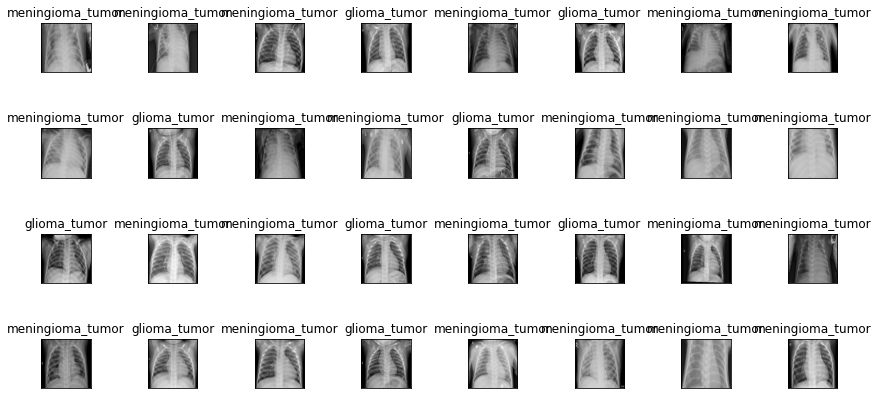

In [25]:
import matplotlib.pyplot as plt

class_dict = { 0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}

plt.figure(figsize=(12,6))

for i in range(len(label)):

    plt.subplot(4, 8, i+1)
    plt.title(str(class_dict[label[i]]))
    plt.xticks([]);  plt.yticks([])
    plt.imshow(data[i])

plt.tight_layout()
plt.show()

# Pre-trained model 준비

In [26]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [27]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [28]:
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [29]:
model.compile(optimizer=Adam(2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          verbose=1)

start_time = datetime.now()

hist = model.fit(train_data,
                 validation_data=test_data,
                 epochs=30,)

end_time = datetime.now()

print('\n\nElapsed time =>', end_time-start_time)

Epoch 1/30
163/163 [==============================] - 83s 483ms/step - loss: 0.3993 - acc: 0.8196 - val_loss: 0.7595 - val_acc: 0.6907
Epoch 2/30
163/163 [==============================] - 78s 480ms/step - loss: 0.1666 - acc: 0.9360 - val_loss: 0.8378 - val_acc: 0.7372
Epoch 3/30
163/163 [==============================] - 79s 481ms/step - loss: 0.1081 - acc: 0.9588 - val_loss: 0.5958 - val_acc: 0.8157
Epoch 4/30
163/163 [==============================] - 78s 480ms/step - loss: 0.0816 - acc: 0.9707 - val_loss: 0.5529 - val_acc: 0.8510
Epoch 5/30
163/163 [==============================] - 78s 476ms/step - loss: 0.0580 - acc: 0.9804 - val_loss: 0.6521 - val_acc: 0.8301
Epoch 6/30
163/163 [==============================] - 78s 477ms/step - loss: 0.0445 - acc: 0.9824 - val_loss: 0.6912 - val_acc: 0.8269
Epoch 7/30
163/163 [==============================] - 77s 472ms/step - loss: 0.0356 - acc: 0.9873 - val_loss: 0.7950 - val_acc: 0.8189
Epoch 8/30
163/163 [==============================] - 7

In [31]:
model.evaluate(test_data)

20/20 [==============================] - 7s 342ms/step - loss: 1.6558 - acc: 0.8013


[1.6558297872543335, 0.8012820482254028]

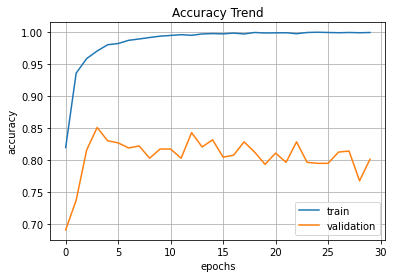

In [32]:
plt.plot(hist.history['acc'],label='train')
plt.plot(hist.history['val_acc'],label='validation')
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

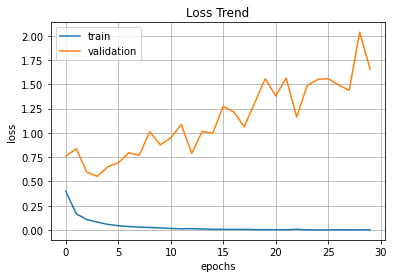

In [33]:
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.grid()
plt.show()